# Assignment 3

## Linear regression - how it works

Linear regression can be used to predict a relationship between two variables. A straight line in the graph shows the relationship. 

The linear regression model: $y = β0 +β1 + Ε$
- $β0$ is the intercept: where the line hits the y axis.
- $β1$ is the slope.
- $Ε(y)$ is an error: what’s left over, what we can’t explain.

In [85]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data pre-processing steps

In [86]:
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


## Selecting variables
I selected these variables below for the predictions. I chosed the variables which looked interesting based on the correlation below.

In [87]:
df_subset = df[['shares_log', 'n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'is_weekend']]

y = df_subset['shares_log'] #We need to take out the shares_log as our Y-variable
X = df_subset.loc[:,'n_tokens_title':'is_weekend'] #this slices the dataframe to include all rows and the columns from "n_tokens_title" to "is_weekend"
X.head()

,n_tokens_title,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,is_weekend
0,10,12,0,0,0,0,0,1,0
1,9,6,0,0,0,0,0,0,0
2,11,0,1,0,0,0,0,0,0
3,8,2,0,0,0,1,0,0,0
4,9,18,0,0,0,0,0,1,0


## The linearity of the relationship
The relationship between tokens_title and shares_log doesn't have a strong linear relationship. The relationship between num_imgs and shares_log and the relationship between num_videos and shares_log have a somewhat stronger linear relationship. However, the distance from the line (the variation) seems to increase at the low amount of num_imgs and num_videos.

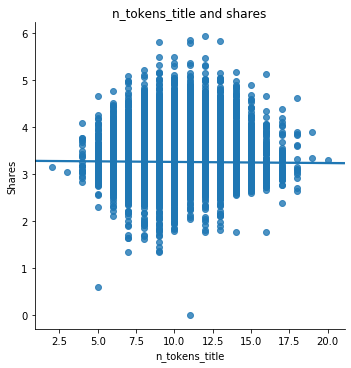

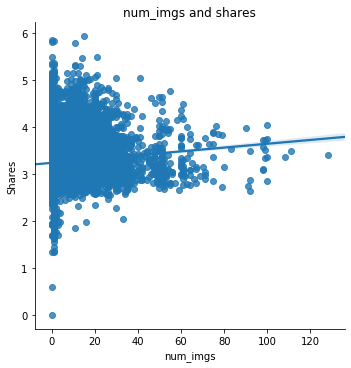

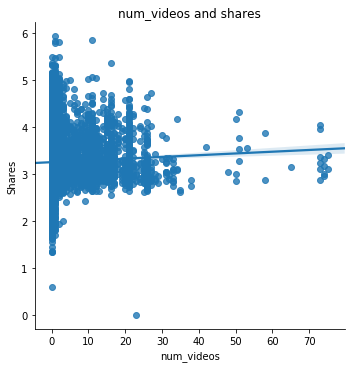

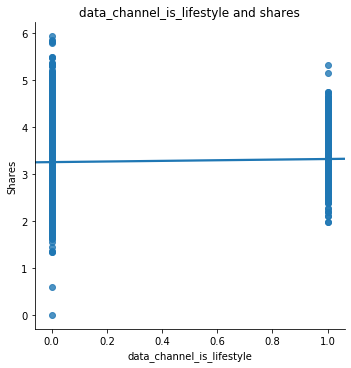

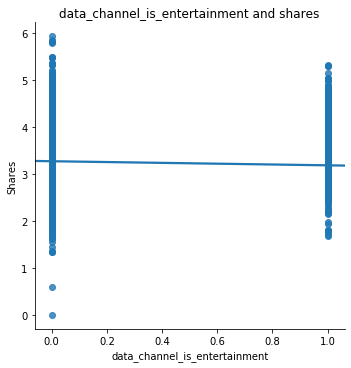

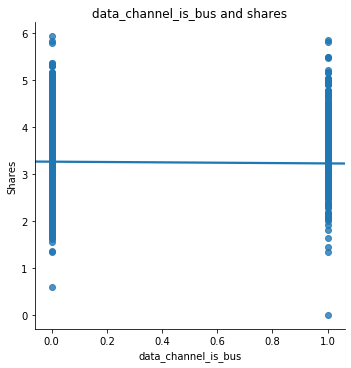

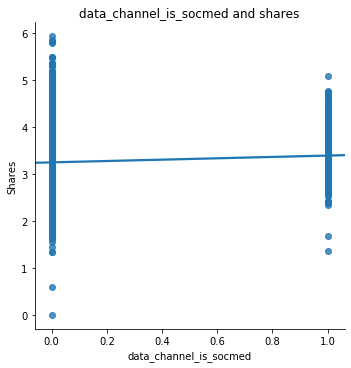

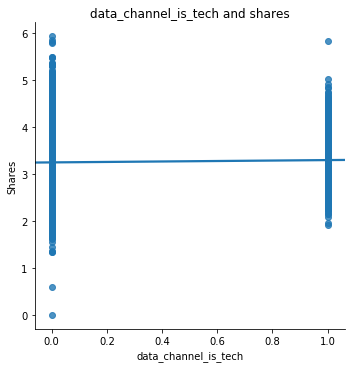

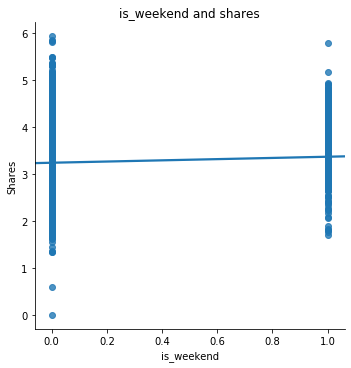

In [88]:
variables = ['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'is_weekend']

for every in variables:
    sns.lmplot(x=every,y='shares_log', fit_reg=True, data=df_subset)
    plt.xlabel(every)
    plt.ylabel('Shares')
    plt.title(every + ' and shares')
    plt.show()

## Create a train and test set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,n_tokens_title,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,is_weekend
20921,7,0,1,0,0,0,0,0,1
4485,9,9,0,0,0,0,0,0,0
17755,9,1,0,0,0,1,0,0,0
4704,12,23,1,0,0,0,0,0,0
13493,8,13,2,0,0,0,0,0,0


## Train the data set
I created the linear regression model and get the coefficient of all the variables.

In [90]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [91]:
y_pred = lm.predict(X_test) #generate the predictions
resid = y_pred - y_test #get the residuals by substracting the prediction

In [92]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
0.001073,n_tokens_title
0.004638,num_imgs
0.006263,num_videos
0.079269,data_channel_is_lifestyle
-0.077031,data_channel_is_entertainment
0.002251,data_channel_is_bus
0.142695,data_channel_is_socmed
0.055370,data_channel_is_tech
0.126436,is_weekend


In [93]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.03767138283384386

The R^2 is 0.037, which means 0.037% of the variation in shares is explained by the model.

In [94]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3983102792277958

The RMSE is 0.39. Which means that we are typically about 0.39 off in our predicted shares.

In [95]:
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_subset[['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'is_weekend']]
 #multiple bracets because you can have multiple x's
y = df_subset['shares_log']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #n_tokens_title #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] #num_imgs
b3 = lm.coef_[2] #num_videos
b4 = lm.coef_[3] #data_channel_is_lifestyle
b5 = lm.coef_[4] #data_channel_is_entertainment
b6 = lm.coef_[5] #data_channel_is_bus
b7 = lm.coef_[6] #data_channel_is_socmed
b8 = lm.coef_[7] #data_channel_is_tech
b10 = lm.coef_[8] #is_weekend
print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X2 + {b3:.2f}X3 + {b4:.2f}X4 + {b5:.2f}X5 + {b6:.2f}X6 + {b7:.2f}X7 + {b8:.2f}X8 + {b9:.2f}X9") #.0f formats to 2 decimals.

The regression line is equal to y = 3.18 + 0.00X + 0.00X2 + 0.01X3 + 0.07X4 + -0.08X5 + 0.00X6 + 0.15X7 + 0.06X8 + -0.23X9


The regression line is equal to $y = 3.18 + 0.00X + 0.00X2 + 0.01X3 + 0.07X4 + -0.08X5 + 0.00X6 + 0.15X7 + 0.06X8 + -0.23X9$

## Prediction of the number of shares with the linear regression model
I created the graph with the correlation between the actual shars and the predicted shares.

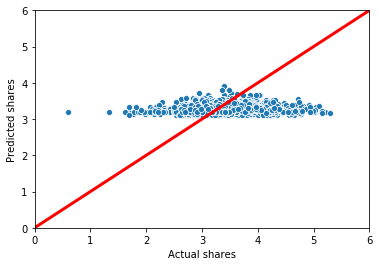

In [96]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,6])
plt.plot([0,6], [0,6], color='red', lw=3) #Plot a diagonal length
plt.show()

The model is not perfect, not all the points are on the line. We can say that the model overshoots (predicts too high) for low numbers of shares, and undershoots for high numbers of shares (predicts too low).

## The residuals with the number of shares
I created the graph with the correlation between the residual and all the variables.

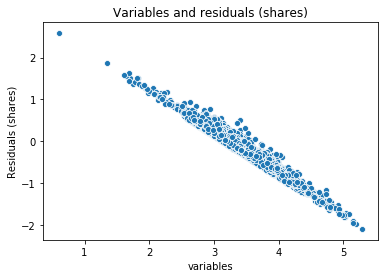

In [97]:
sns.scatterplot(x=y_test,y=resid, data=df_subset)
plt.xlabel("variables")
plt.ylabel('Residuals (shares)')
plt.title('Variables and residuals (shares)')
plt.show()

There are not a lot of residuals (errors). There is a straight line and there are not a lot of outliers. 